In [1]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.datasets import load_digits, load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from umap import UMAP
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [4]:
# data: pd.DataFrame = pd.read_csv('zoo.csv')
data = load_digits(as_frame=True).data

data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [5]:
D = data

In [6]:
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
D

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,...,0.3125,0.0,0.0,0.000000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,...,0.5625,0.0,0.0,0.000000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.2500,0.0,0.0,0.000000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0
1793,0.0,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.000000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0
1794,0.0,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0
1795,0.0,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.000000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0


In [10]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper


In [11]:
# T = TSNE(n_components=2, perplexity=25, random_state=123)
# TSNE_features = T.fit_transform(D)

perplexities =  [5, 25, 50]
indexes = [i + 1 for i in range(len(perplexities))]
@timeit
def get_tsne_features(perplexities):
     return [TSNE(n_components=2, perplexity=i, random_state=123).fit_transform(D)
                for i in perplexities]

TSNE_features = get_tsne_features(perplexities)


d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\pro

Function get_tsne_features([5, 25, 50],) {} Took 12.9545 seconds


perplexity=5


C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\2576042323.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


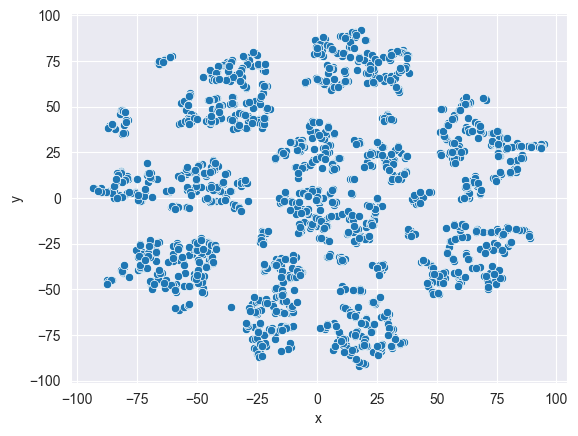

perplexity=25


C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\2576042323.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


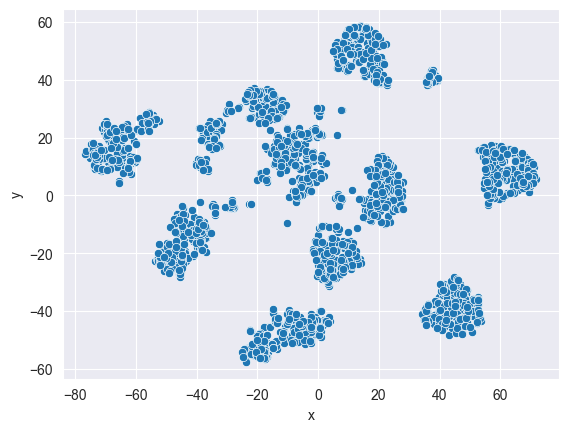

perplexity=50


C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\2576042323.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


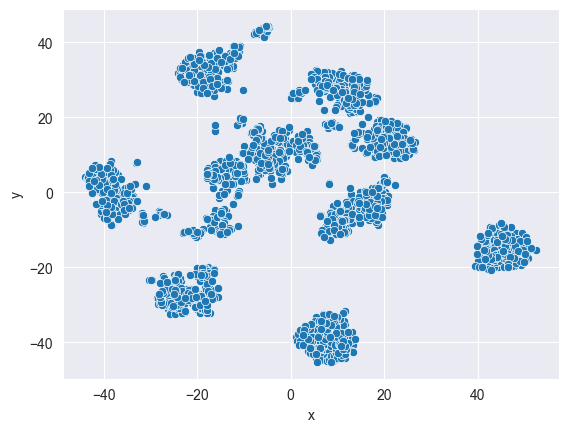

In [13]:
DATA = D.copy()

for i, perplexity, TSNE_feature in zip(indexes, perplexities, TSNE_features):
    DATA['x']=TSNE_feature[:, 0]
    DATA['y']=TSNE_feature[:, 1]
    fig = plt.figure()
    print(f"perplexity={perplexity}")
    sns.scatterplot(x='x', y='y', data=DATA, palette='bright')
    plt.show()


In [14]:
n_neighbors = (5, 25, 50)
min_dist = (0.1, 0.6)
DATA = D.copy()

@timeit
def get_umap_data(n_neighbors, min_dist, data):
    umap = {}
    for i in range(len(n_neighbors)):
        for j in range(len(min_dist)):
            umap[(n_neighbors[i],min_dist[j])]=(UMAP(n_neighbors=n_neighbors[i], min_dist=min_dist[j], random_state=123).fit_transform(data))
    return umap

um = get_umap_data(n_neighbors, min_dist, DATA)


Function get_umap_data((5, 25, 50), (0.1, 0.6),       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0     0.3125     0.8125     0.5625     0.0625   
1           0.0        0.0     0.0000     0.7500     0.8125     0.3125   
2           0.0        0.0     0.0000     0.2500     0.9375     0.7500   
3           0.0        0.0     0.4375     0.9375     0.8125     0.0625   
4           0.0        0.0     0.0000     0.0625     0.6875     0.0000   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0     0.2500     0.6250     0.8125     0.3750   
1793        0.0        0.0     0.3750     1.0000     0.8125     0.6875   
1794        0.0        0.0     0.0625     0.6875     0.9375     0.0625   
1795        0.0        0.0     0.1250     0.6250     0.4375     0.0000   
1796        0.0        0.0     0.6250     0.8750     0.5000     0.0625   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_

n_neighbors=5, min_dist=0.1


C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


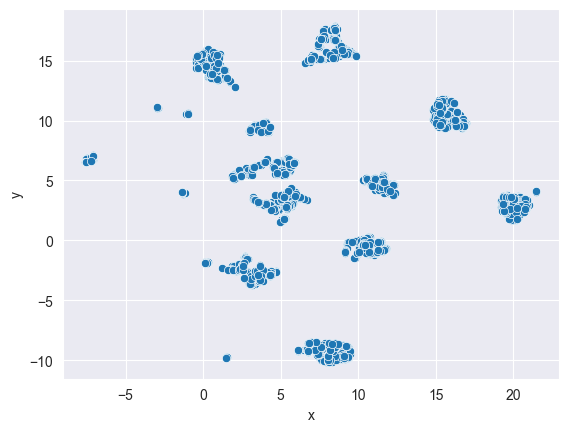

n_neighbors=5, min_dist=0.6


C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


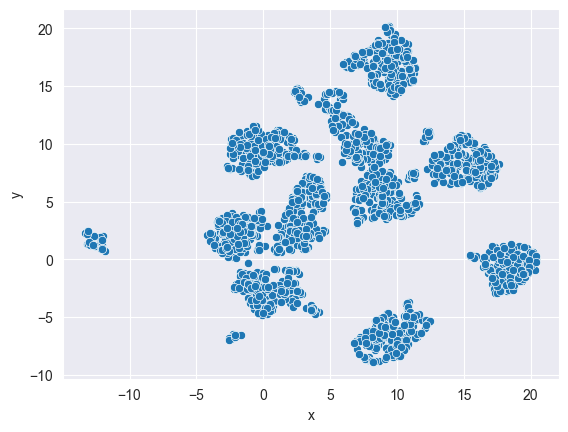

C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


n_neighbors=25, min_dist=0.1


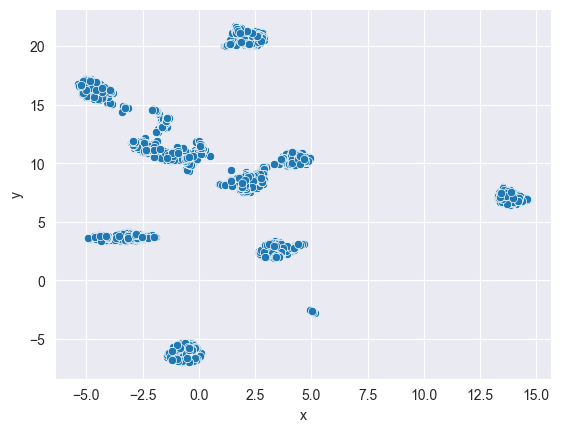

C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


n_neighbors=25, min_dist=0.6


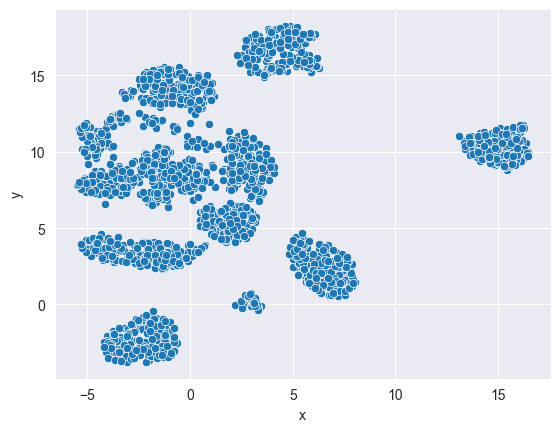

C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


n_neighbors=50, min_dist=0.1


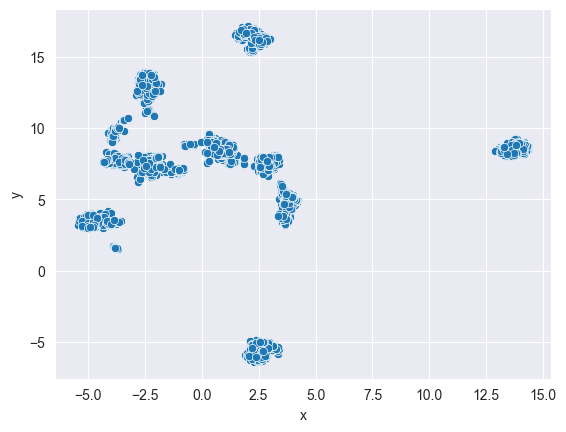

C:\Users\sasha\AppData\Local\Temp\ipykernel_21224\3170172163.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=DATA, palette='bright')


n_neighbors=50, min_dist=0.6


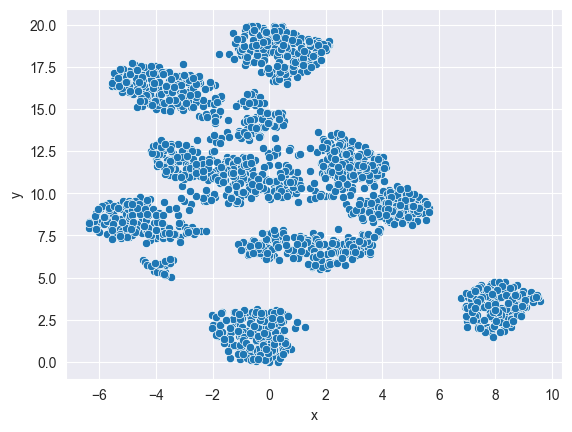

In [20]:
# fig = plt.figure()
# sns.scatterplot(hue=data['class_type'], data=], palette='bright')
# plt.show()
# um[(5, 0.1)]
d = [(5, 0.1), (5, 0.6), (25, 0.1), (25, 0.6), (50, 0.1), (50, 0.6)]
for frame in d:
    DATA['x']=um[frame][:, 0]
    DATA['y']=um[frame][:, 1]
    fig = plt.figure()
    print(f"n_neighbors={frame[0]}, min_dist={frame[1]}")
    sns.scatterplot(x='x', y='y', data=DATA, palette='bright')
    plt.show()



In [19]:
[column for column in data.columns]

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']